ToDo

1. 最长连续出了多少期；
2. 最长连续多少期没有出.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import sys
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_column", 100)
sns.set_style("whitegrid")
sns.set_palette("Blues_r", 12)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
import warnings
warnings.filterwarnings("ignore")
import matplotlib
# print(matplotlib.matplotlib_fname())
%matplotlib inline
# %pwd

In [2]:
def read_data(year, file="data_00_18.xlsx"):
    df = pd.read_excel(file, sheet_name=str(year)).dropna().reset_index(drop=True)
    try:
        df.drop("总和单双", axis=1, inplace=True)
    except:
        pass
    df.期数 = [x[:-1] for x in df.期数.values]
    df.特头 = [x[:-1] for x in df.特头.values]
    df.尾数 = [x[:-1] for x in df.尾数.values]
    df.合单双 = [x[-1] for x in df.合单双.values]
    df.家野 = [x[:-1] for x in df.家野.values]
    df.门数 = [x[:-1] for x in df.门数.values]
    df.段位 = [x[:-1] for x in df.段位.values]
    df.色肖 = [x[:-1] for x in df.色肖.values]
    df.笔画 = [x[:-1] for x in df.笔画.values]
    
    return df

In [3]:
for year in range(2018, 2000-1, -1):
    if year == 2018:
        df_now = read_data(year)
    else:
        df = read_data(year)
        df_now = pd.concat([df_now, df])
        
df_now.reset_index(inplace=True, drop=True)

In [4]:
df_now.to_csv("data_00_18.csv")
df_now.iloc[140:145, :]

,搅珠日期,期数,特码,生肖,单双,波色,大小,五行,特头,尾数,合单双,家野,门数,段位,阴阳,天地,吉凶,黑白,色肖,笔画,男女
140,2018-01-11,003,19,兔,单,红,小,土,1,9,双,野,3,3,阳,天,吉,白,红,双,女
141,2018-01-06,002,23,猪,单,红,小,火,2,3,单,家,3,4,阴,天,凶,白,蓝,单,女
142,2018-01-02,001,36,狗,双,蓝,大,水,3,6,单,家,4,6,阴,地,凶,白,绿,双,男
143,2017-12-30,153,37,鸡,单,蓝,大,木,3,7,双,家,4,6,阳,地,吉,黑,红,单,女
144,2017-12-28,152,11,猪,单,绿,小,土,1,1,双,家,2,2,阴,天,凶,白,蓝,单,女


In [5]:
df_now.shape

(2709, 21)

---

###   以上已将数据处理完毕，从此处开始分析

In [8]:
df_now = pd.read_csv("data_00_18.csv").loc[:, "搅珠日期":]
df_now.搅珠日期 = pd.to_datetime(df_now.搅珠日期)
df_now.特码.astype(int)
print(df_now.shape)
df_now.head()

(2709, 21)


,搅珠日期,期数,特码,生肖,单双,波色,大小,五行,特头,尾数,合单双,家野,门数,段位,阴阳,天地,吉凶,黑白,色肖,笔画,男女
0,2018-12-15,143,22.0,牛,双,绿,小,水,2,2,双,家,3,4,阳,天,凶,黑,绿,双,男
1,2018-12-13,142,39.0,猴,单,绿,大,木,3,9,双,野,5,6,阳,天,凶,白,蓝,双,男
2,2018-12-11,141,22.0,牛,双,绿,小,水,2,2,双,家,3,4,阳,天,凶,黑,绿,双,男
3,2018-12-08,140,43.0,龙,单,绿,大,土,4,3,单,野,5,7,阴,天,吉,白,绿,单,男
4,2018-12-06,139,34.0,牛,双,红,大,金,3,4,单,家,4,5,阳,天,凶,黑,绿,双,男


In [6]:
def total_no_shows(cat, item):
    cat_list = df_now[cat].values.tolist()
    
    cnt = 0
    cnt_list = []
    
    for i in cat_list:
#         print(i, end=", ")
        if i == item:
            cnt_list.append(cnt+1)
            cnt = 0
        else:
            cnt += 1
    print(item)        
    return sorted(cnt_list, reverse=True)[:29]

In [7]:
print("2000首期～2018年143期：【生肖】连续不出现次数一览")
print(total_no_shows("生肖", "鼠"))
print(total_no_shows("生肖", "牛"))
print(total_no_shows("生肖", "虎"))
print(total_no_shows("生肖", "兔"))
print(total_no_shows("生肖", "龙"))
print(total_no_shows("生肖", "蛇"))
print(total_no_shows("生肖", "马"))
print(total_no_shows("生肖", "羊"))
print(total_no_shows("生肖", "猴"))
print(total_no_shows("生肖", "鸡"))
print(total_no_shows("生肖", "狗"))
print(total_no_shows("生肖", "猪"))

2000首期～2018年143期：【生肖】连续不出现次数一览
鼠
[55, 50, 43, 42, 42, 40, 40, 39, 35, 35, 34, 32, 31, 31, 30, 30, 30, 30, 30, 29, 29, 29, 27, 26, 25, 25, 25, 24, 24]
牛
[117, 67, 62, 61, 61, 59, 53, 50, 43, 43, 41, 38, 37, 35, 34, 34, 32, 31, 30, 30, 29, 28, 28, 27, 27, 27, 27, 26, 25]
虎
[70, 61, 52, 47, 43, 42, 40, 39, 38, 35, 34, 33, 32, 32, 31, 29, 29, 28, 27, 27, 25, 25, 25, 24, 24, 23, 23, 22, 22]
兔
[52, 51, 45, 45, 43, 41, 40, 40, 38, 36, 35, 33, 31, 31, 30, 30, 29, 29, 27, 26, 25, 25, 25, 24, 24, 24, 23, 23, 22]
龙
[62, 51, 47, 47, 44, 40, 40, 39, 38, 38, 37, 37, 35, 33, 33, 32, 32, 32, 32, 29, 29, 27, 26, 26, 26, 26, 26, 25, 24]
蛇
[102, 70, 46, 46, 44, 44, 42, 41, 41, 40, 39, 38, 38, 37, 36, 35, 35, 34, 34, 33, 29, 28, 27, 27, 27, 23, 23, 23, 23]
马
[58, 55, 48, 42, 40, 40, 40, 40, 38, 38, 36, 35, 35, 35, 34, 34, 33, 31, 31, 31, 30, 28, 28, 28, 28, 27, 24, 24, 24]
羊
[53, 50, 46, 41, 41, 41, 40, 37, 37, 37, 35, 33, 33, 33, 32, 32, 31, 31, 31, 31, 30, 29, 29, 29, 28, 27, 26, 25, 24]
猴
[75, 60, 56, 

##### 2018年

In [41]:
df = df_now[df_now.搅珠日期 >= pd.Timestamp(2018,1,1)]
df.shape

(143, 21)

In [53]:
def no_shows_dict(cat):
    """
    
    """
    item_unique = df[cat].unique().tolist()
    item_dict = {}
    for item in item_unique:
        item_dict[item] = df.loc[df[cat] == item].index[0]
    item_dict = sorted(item_dict.items(), key = lambda x:x[1], reverse = True)
    print(cat)
    return item_dict

In [108]:
print("2018年度截止143期，没出现的次数一览")
print(no_shows_dict("生肖"))
print(no_shows_dict("单双"))
print(no_shows_dict("波色"))
print(no_shows_dict("大小"))
print(no_shows_dict("五行"))
print(no_shows_dict("特头"))
print(no_shows_dict("尾数"))
print(no_shows_dict("合单双"))
print(no_shows_dict("家野"))
print(no_shows_dict("门数"))
print(no_shows_dict("段位"))
print(no_shows_dict("阴阳"))
print(no_shows_dict("天地"))
print(no_shows_dict("吉凶"))
print(no_shows_dict("黑白"))
print(no_shows_dict("色肖"))
print(no_shows_dict("笔画"))
print(no_shows_dict("男女"))

2018年度截止143期，没出现的次数一览
生肖
[('蛇', 35), ('羊', 32), ('狗', 25), ('猪', 17), ('马', 14), ('虎', 12), ('鸡', 11), ('兔', 9), ('鼠', 6), ('龙', 3), ('猴', 1), ('牛', 0)]
单双
[('单', 1), ('双', 0)]
波色
[('蓝', 6), ('红', 4), ('绿', 0)]
大小
[('大', 1), ('小', 0)]
五行
[('火', 9), ('金', 4), ('土', 3), ('木', 1), ('水', 0)]
特头
[(0, 15), (1, 5), (4, 3), (3, 1), (2, 0)]
尾数
[(0, 35), (1, 22), (6, 18), (8, 11), (5, 7), (7, 6), (4, 4), (3, 3), (9, 1), (2, 0)]
合单双
[('单', 3), ('双', 0)]
家野
[('野', 1), ('家', 0)]
门数
[(2, 16), (1, 15), (4, 4), (5, 1), (3, 0)]
段位
[(1, 24), (2, 15), (3, 5), (5, 4), (7, 3), (6, 1), (4, 0)]
阴阳
[('阴', 3), ('阳', 0)]
天地
[('地', 6), ('天', 0)]
吉凶
[('吉', 3), ('凶', 0)]
黑白
[('白', 1), ('黑', 0)]
色肖
[('红', 6), ('蓝', 1), ('绿', 0)]
笔画
[('单', 3), ('双', 0)]
男女
[('女', 9), ('男', 0)]


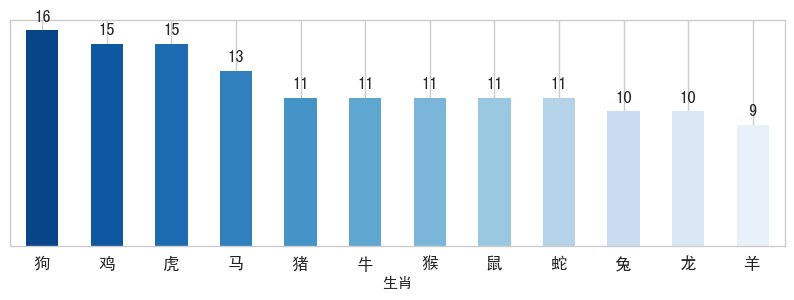

In [42]:
def stats_func(x):
    "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart"
    cnt = df[x].value_counts()
    fig = plt.figure(figsize=(10, 3))
    ax = cnt.plot(kind='bar')
    
    rects = ax.patches
    labels = ["{}".format(i) for i in cnt.values.tolist()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
                ha='center', va='bottom', fontsize=12)
        
    ax.set_xlabel(x)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks([])

    fig.show()

interact(stats_func, x=df.columns[3:].tolist());